In [1]:
!pip install prophet
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-n0gjig2r/fbprophet_13d57340cc2341ec8233b357b3611363/setup.py'"'"'; __file__='"'"'/tmp/pip-install-n0gjig2r/fbprophet_13d57340cc2341ec8233b357b3611363/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'fr

In [2]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

in deva noteb

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/ColabNotebooks/ML/projects/natural-gas/

/content/drive/MyDrive/ColabNotebooks/ML/projects/natural-gas


In [5]:
df = pd.read_csv('data_preprocessing/nasdaq_data.csv')
df.reset_index(drop=True, inplace=True)

In [6]:
df = df[::-1]
df.head()

,Date,Close/Last,Volume,Open,High,Low
2550,05/02/2012,2.253,153675.0,2.371,2.384,2.236
2549,05/03/2012,2.340,152267.0,2.260,2.379,2.253
2548,05/04/2012,2.279,112541.0,2.340,2.373,2.265
2547,05/07/2012,2.336,84553.0,2.277,2.358,2.273
2546,05/08/2012,2.393,147686.0,2.323,2.460,2.280


In [9]:
df=df[["Date","Close/Last"]]
df.head()

,Date,Close/Last
2550,05/02/2012,2.253
2549,05/03/2012,2.340
2548,05/04/2012,2.279
2547,05/07/2012,2.336
2546,05/08/2012,2.393


In [10]:
df.columns = ['ds','y']

In [11]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

<ipython-input-11-df3eb660f625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
4,2022-04-25,6.669
3,2022-04-26,6.850
2,2022-04-27,7.267
1,2022-04-28,6.888
0,2022-04-29,7.244


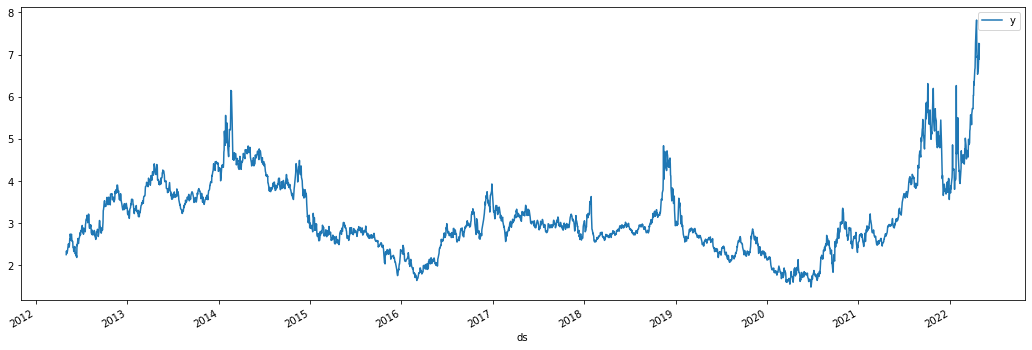

In [12]:
df.plot(x='ds',y='y',figsize=(18,6))

In [13]:
len(df)

2551

In [14]:
train = df.iloc[:len(df)-510]
test = df.iloc[len(df)-510:]

In [15]:
test.shape

(510, 2)

In [16]:
train.shape

(2041, 2)

In [17]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=510) 
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2546,2021-09-10,0.583371,-1.112551,2.082374,-1.093532,2.063881,0.007226,0.007226,0.007226,0.059950,0.059950,0.059950,-0.052724,-0.052724,-0.052724,0.0,0.0,0.0,0.590597
2547,2021-09-11,0.581010,-1.360314,1.883838,-1.101441,2.065336,-0.196643,-0.196643,-0.196643,-0.147071,-0.147071,-0.147071,-0.049573,-0.049573,-0.049573,0.0,0.0,0.0,0.384367
2548,2021-09-12,0.578649,-1.281242,1.992802,-1.109350,2.067336,-0.193445,-0.193445,-0.193445,-0.147071,-0.147071,-0.147071,-0.046374,-0.046374,-0.046374,0.0,0.0,0.0,0.385204
2549,2021-09-13,0.576288,-1.143718,2.050163,-1.117259,2.069520,0.006432,0.006432,0.006432,0.049508,0.049508,0.049508,-0.043075,-0.043075,-0.043075,0.0,0.0,0.0,0.582721
2550,2021-09-14,0.573927,-1.042146,2.110576,-1.125168,2.071704,0.020059,0.020059,0.020059,0.059682,0.059682,0.059682,-0.039623,-0.039623,-0.039623,0.0,0.0,0.0,0.593987


In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2546,2021-09-10,0.590597,-1.112551,2.082374
2547,2021-09-11,0.384367,-1.360314,1.883838
2548,2021-09-12,0.385204,-1.281242,1.992802
2549,2021-09-13,0.582721,-1.143718,2.050163
2550,2021-09-14,0.593987,-1.042146,2.110576


In [20]:
test.tail()

,ds,y
4,2022-04-25,6.669
3,2022-04-26,6.850
2,2022-04-27,7.267
1,2022-04-28,6.888
0,2022-04-29,7.244


In [21]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [26]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import *
from math import sqrt

In [24]:
predictions = forecast.iloc[-510:]['yhat']

In [27]:
RMSE = sqrt(mean_squared_error(predictions,test['y']))
MAPE = mean_absolute_percentage_error(predictions,test['y']) 

In [30]:
RMSE

2.8352523979717072

In [31]:
MAPE

2.9824879345012048

In [32]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  2.8352523979717072
Mean Value of Test Dataset: 3.441250980392157
